<a href="https://colab.research.google.com/github/HussainAhmed75/NTI-AI-and-ML-exercises-/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
df=pd.read_csv('/content/StudentPerformanceFactors.csv')

In [ ]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [ ]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [ ]:
df.isnull().sum().sort_values(ascending=False)

,0
Parental_Education_Level,90
Teacher_Quality,78
Distance_from_Home,67
Hours_Studied,0
Access_to_Resources,0
Parental_Involvement,0
Attendance,0
Extracurricular_Activities,0
Motivation_Level,0
Internet_Access,0


In [ ]:
df['Parental_Education_Level']

,Parental_Education_Level
0,High School
1,College
2,Postgraduate
3,High School
4,College
...,...
6602,High School
6603,High School
6604,Postgraduate
6605,High School


In [ ]:
df['Parental_Education_Level'].unique()

array(['High School', 'College', 'Postgraduate', nan], dtype=object)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
for column in ['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home']:
    if df[column].isnull().any():
        mode_value = df[column].mode()[0]
        df[column].fillna(mode_value, inplace=True)

df['Parental_Education_Level']

,Parental_Education_Level
0,High School
1,College
2,Postgraduate
3,High School
4,College
...,...
6602,High School
6603,High School
6604,Postgraduate
6605,High School


In [ ]:
df.isnull().sum().sort_values(ascending=False)

,0
Hours_Studied,0
Attendance,0
Sleep_Hours,0
Previous_Scores,0
Tutoring_Sessions,0
Physical_Activity,0
Exam_Score,0
Parental_Involvement_Low,0
Parental_Involvement_Medium,0
Access_to_Resources_Low,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6607 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [ ]:
df.select_dtypes(include='object').columns

Index([], dtype='object')

In [ ]:
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    print(f"Unique values for '{col}': {df[col].unique()}")

In [ ]:
X = df.drop(columns=['Exam_Score'])
y = df['Exam_Score']

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=X.columns)


In [ ]:
df.skew()

,0
Hours_Studied,0.013499
Attendance,0.013666
Sleep_Hours,-0.023805
Previous_Scores,-0.003737
Tutoring_Sessions,0.815530
Physical_Activity,-0.031365
Exam_Score,1.644808
Parental_Involvement_Low,1.482011
Parental_Involvement_Medium,-0.035431
Access_to_Resources_Low,1.510311


<Axes: >

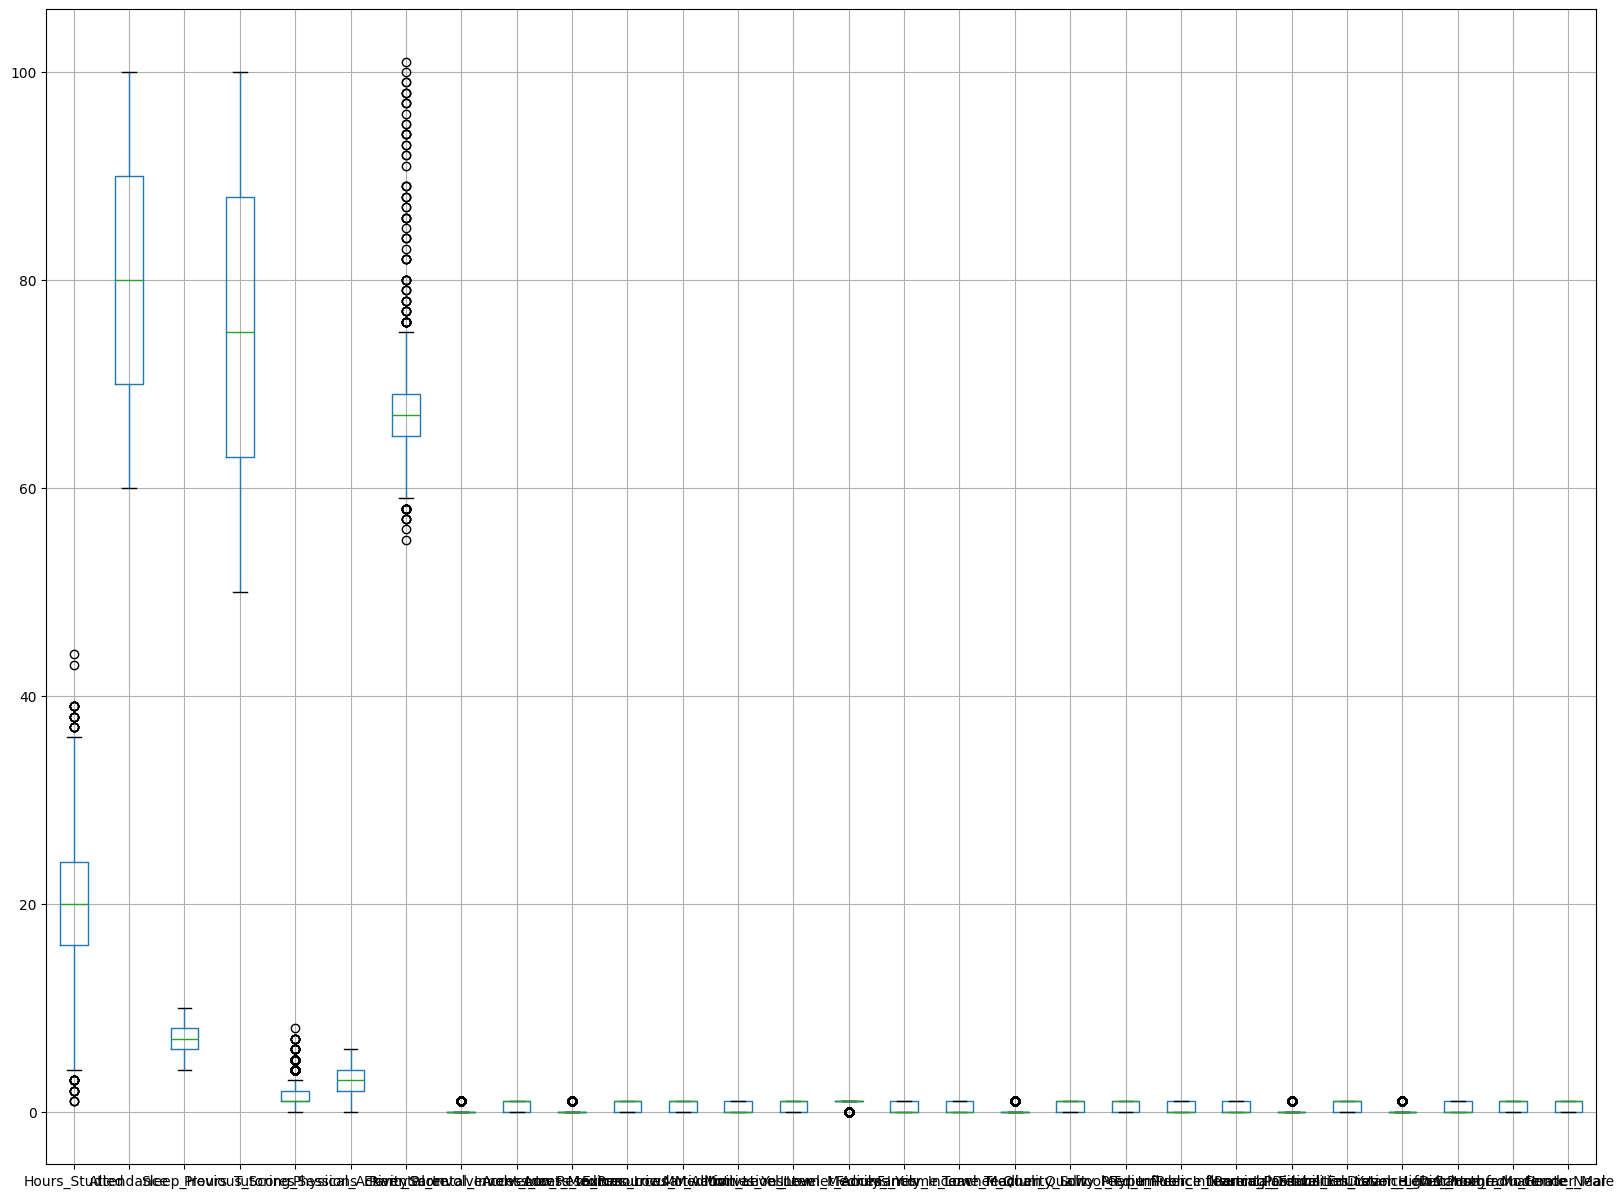

In [ ]:
df.boxplot(figsize=(20,15))


<Axes: >

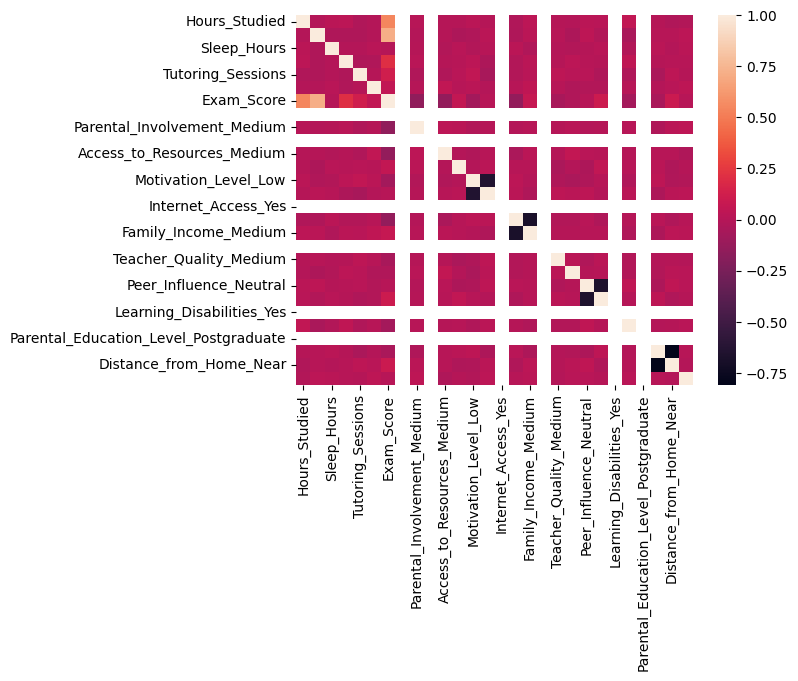

In [ ]:
sns.heatmap(df.corr(), annot=False)


In [ ]:
df = df.copy()
cols = df.select_dtypes(include=['int64','float64']).columns

for col in cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]
df.shape

(2317, 28)

In [ ]:
X = df.drop(columns=['Exam_Score'])
y = df['Exam_Score']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

X_train_scaled.head(), X_test_scaled.head()

(   Hours_Studied  Attendance  Sleep_Hours  Previous_Scores  Tutoring_Sessions  \
 0       0.344410   -0.486535    -1.369040         1.662603          -1.313187   
 1      -1.351554   -1.011301    -0.682110        -0.514048           0.741128   
 2      -0.503572    0.213154     0.691749         1.592388           1.768285   
 3      -0.164379   -0.399074     2.065608         0.258312          -0.286030   
 4      -0.842765   -1.623529     2.065608         1.241316          -1.313187   
 
    Physical_Activity  Parental_Involvement_Low  Parental_Involvement_Medium  \
 0          -0.971477                       0.0                    -1.349220   
 1           1.000206                       0.0                    -1.349220   
 2           1.000206                       0.0                     0.741169   
 3          -0.971477                       0.0                     0.741169   
 4           1.000206                       0.0                     0.741169   
 
    Access_to_Resources_

In [ ]:
models ={
    "linerRegression":LinearRegression(),
    "lasso":Lasso(),
    "lidge":Ridge()

}

In [ ]:
errors =[]
for name,model in models.items():
  model.fit(X_train,y_train)
  y_pred_train=model.predict(X_train)
  y_pred_test=model.predict(X_test)
  errors.append({
      "Model":name,
      "MSE_train":mean_squared_error(y_train,y_pred_train),
      "MSE_test":mean_squared_error(y_test,y_pred_test),
      "R2_train":r2_score(y_train,y_pred_train),
      "R2_test":r2_score(y_test,y_pred_test),
      "RMSE_train":np.sqrt(mean_squared_error(y_train,y_pred_train)),
      "RMSE_test":np.sqrt(mean_squared_error(y_test,y_pred_test)),

      })

In [ ]:
errors_df=pd.DataFrame(errors)
errors_df

,Model,MSE_train,MSE_test,R2_train,R2_test,RMSE_train,RMSE_test
0,linerRegression,0.112170,0.108680,0.988764,0.989876,0.334918,0.329667
1,lasso,1.552481,1.625685,0.844494,0.848566,1.245986,1.275023
2,lidge,0.112194,0.108844,0.988762,0.989861,0.334953,0.329916


In [ ]:
LR=Lasso()
LR.fit(X_train,y_train)
LR.fit(X_train,y_train)

Lasso()

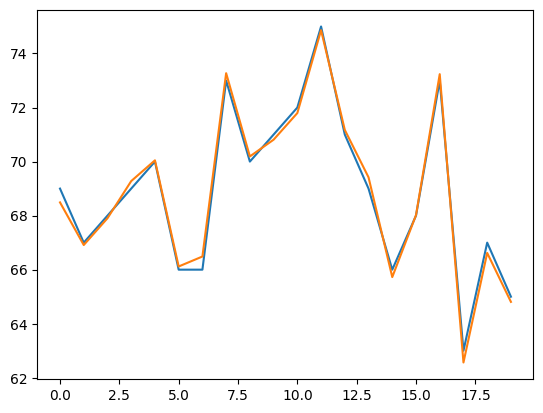

In [ ]:
plt.plot(y_test[:20].values, label='Actual rent')
plt.plot(y_pred_test[:20], label='Predicted rent')